In [2]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error

#Load Dataset
df = pd.read_csv('./medical_clean_task2.csv', index_col=0)

#View Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [3]:
#Inspect Dataframe's information
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
#Convert column to string from int, then front-fill string with 0's to reach 5 chars
df['Zip'] = df['Zip'].astype("str").str.zfill(5)
#Convert column to category from string
df["Area"] = df["Area"].astype("category")
#Convert column to category from string
df["TimeZone"] = df["TimeZone"].astype("category")
#Reformat column representing currency in USD to 3 decimal places from 6
df["Income"] = df["Income"].astype(int)
#Convert column to category from string
df["Marital"] = df["Marital"].astype("category")
#Convert column to category from string
df["Gender"] = df["Gender"].astype("category")
#Recast object > boolean wants to turn everything True, need to map Yes/No to True/False
bool_mapping = {"Yes" : 1, "No" : 0}
#Convert column to boolean from string
df["ReAdmis"] = df["ReAdmis"].map(bool_mapping)
#Convert column to boolean from string
df["Soft_drink"] = df["Soft_drink"].map(bool_mapping)
#Convert column to category from string
df["Initial_admin"] = df["Initial_admin"].astype("category")
#Convert column to boolean from string
df["HighBlood"] = df["HighBlood"].map(bool_mapping)
#Convert column to boolean from string
df["Stroke"] = df["Stroke"].map(bool_mapping)
#Convert column to category from string
df["Complication_risk"] = df["Complication_risk"].astype("category")
#Convert column to boolean from string
df["Overweight"] = df["Overweight"].map(bool_mapping)
#Convert column to boolean from string
df["Arthritis"] = df["Arthritis"].map(bool_mapping)
#Convert column to boolean from string
df["Diabetes"] = df["Diabetes"].map(bool_mapping)
#Convert column to boolean from string
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(bool_mapping)
#Convert column to boolean from string
df["BackPain"] = df["BackPain"].map(bool_mapping)
#Convert column to boolean from string
df["Anxiety"] = df["Anxiety"].map(bool_mapping)
#Convert column to boolean from string
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].map(bool_mapping)
#Convert column to boolean from string
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(bool_mapping)
#Convert column to boolean from string
df["Asthma"] = df["Asthma"].map(bool_mapping)
#Convert column to category from string
df["Services"] = df["Services"].astype("category")
#Reformat column representing currency in USD to 3 decimal places from 6
df["TotalCharge"] = df.TotalCharge.round(3)
#Reformat column representing currency in USD to 3 decimal places from 6
df["Additional_charges"] = df.Additional_charges.round(3)

#Establish map for reversing survey questions to reflect a truth where 1 < 8 (currently the reverse)
survey_mapping = {1: 8, 2: 7, 3 : 6, 4: 5, 5: 4, 6: 3, 7 : 2, 8 : 1}
#Establish ordered categorical datatype structure ("1" < "2" < ... < "7" < "8") for survey response columns
survey_scores = CategoricalDtype(categories=["1", "2", "3", "4", "5", "6", "7", "8"], ordered=True)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item1"] = df["Item1"].map(survey_mapping)
#Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item1"] = df["Item1"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item1"] = df["Item1"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item2"] = df["Item2"].map(survey_mapping)
#Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item2"] = df["Item2"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item2"] = df["Item2"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item3"] = df["Item3"].map(survey_mapping)
#Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item3"] = df["Item3"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item3"] = df["Item3"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item4"] = df["Item4"].map(survey_mapping)
#Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item4"] = df["Item4"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item4"] = df["Item4"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item5"] = df["Item5"].map(survey_mapping)
#Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item5"] = df["Item5"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item5"] = df["Item5"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item6"] = df["Item6"].map(survey_mapping)
#Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item6"] = df["Item6"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item6"] = df["Item6"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item7"] = df["Item7"].map(survey_mapping)
#Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item7"] = df["Item7"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item7"] = df["Item7"].astype(survey_scores)
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item8"] = df["Item8"].map(survey_mapping)
#Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item8"] = df["Item8"].map(str)
#Reassign datatype from strings to created survey_scores datatype 
df["Item8"] = df["Item8"].astype(survey_scores)
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.703,17939.403,6,6,7,7,5,6,6,5
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190,17612.998,6,5,6,5,5,5,6,6
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234,17505.192,7,5,5,5,6,5,6,6
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830,12993.437,6,4,4,6,5,4,4,4
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073,3716.526,7,8,6,6,4,6,5,6


#Looking at Variable Stats and Counts

In [5]:
df.Area.value_counts()

Area
Rural       3369
Suburban    3328
Urban       3303
Name: count, dtype: int64

In [6]:
df.Children.value_counts().sort_index()

Children
0     2548
1     2509
2     1475
3     1489
4      995
5      169
6      191
7      213
8      209
9      108
10      94
Name: count, dtype: int64

In [7]:
df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [8]:
df.Gender.value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

In [9]:
df.ReAdmis.value_counts()

ReAdmis
0    6331
1    3669
Name: count, dtype: int64

In [10]:
df.VitD_levels.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [11]:
df.Doc_visits.describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [12]:
df.Full_meals_eaten.describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64

In [13]:
df.vitD_supp.describe()

count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: vitD_supp, dtype: float64

In [14]:
df.Soft_drink.value_counts()

Soft_drink
0    7425
1    2575
Name: count, dtype: int64

In [15]:
df.Initial_admin.value_counts().sort_index()

Initial_admin
Elective Admission       2504
Emergency Admission      5060
Observation Admission    2436
Name: count, dtype: int64

In [16]:
df.HighBlood.value_counts()

HighBlood
0    5910
1    4090
Name: count, dtype: int64

In [17]:
df.Stroke.value_counts()

Stroke
0    8007
1    1993
Name: count, dtype: int64

In [18]:
df.Complication_risk.value_counts().sort_index()

Complication_risk
High      3358
Low       2125
Medium    4517
Name: count, dtype: int64

In [19]:
df.Overweight.value_counts()

Overweight
1    7094
0    2906
Name: count, dtype: int64

In [20]:
df.Arthritis.value_counts()

Arthritis
0    6426
1    3574
Name: count, dtype: int64

In [21]:
df.Diabetes.value_counts()

Diabetes
0    7262
1    2738
Name: count, dtype: int64

In [22]:
df.Hyperlipidemia.value_counts()

Hyperlipidemia
0    6628
1    3372
Name: count, dtype: int64

In [23]:
df.Anxiety.value_counts()

Anxiety
0    6785
1    3215
Name: count, dtype: int64

In [24]:
df.Allergic_rhinitis.value_counts()

Allergic_rhinitis
0    6059
1    3941
Name: count, dtype: int64

In [25]:
df.Reflux_esophagitis.value_counts()

Reflux_esophagitis
0    5865
1    4135
Name: count, dtype: int64

In [26]:
df.Asthma.value_counts()

Asthma
0    7107
1    2893
Name: count, dtype: int64

In [27]:
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer_id         10000 non-null  object  
 1   Interaction         10000 non-null  object  
 2   UID                 10000 non-null  object  
 3   City                10000 non-null  object  
 4   State               10000 non-null  object  
 5   County              10000 non-null  object  
 6   Zip                 10000 non-null  object  
 7   Lat                 10000 non-null  float64 
 8   Lng                 10000 non-null  float64 
 9   Population          10000 non-null  int64   
 10  Area                10000 non-null  category
 11  TimeZone            10000 non-null  category
 12  Job                 10000 non-null  object  
 13  Children            10000 non-null  int64   
 14  Age                 10000 non-null  int64   
 15  Income              10000 non-null  int64

In [29]:
#Load Encoder to create Dummy Variables for KNN Classification
OneHotEncode = OneHotEncoder()
print(OneHotEncode)

#OneHotencode Categorical Columns Area, Gender, Initial Admin, and Complication Risk
encoded_dummies = OneHotEncode.fit_transform(df[["Area", "Gender", "Initial_admin", "Complication_risk"]]).toarray()

#Print the categories
categories = OneHotEncode.categories_
print(categories)

OneHotEncoder()
[array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Female', 'Male', 'Nonbinary'], dtype=object), array(['Elective Admission', 'Emergency Admission',
       'Observation Admission'], dtype=object), array(['High', 'Low', 'Medium'], dtype=object)]


In [30]:
#Convert the encoded array to a DataFrame
encoded_df = pd.DataFrame(encoded_dummies, columns=OneHotEncode.get_feature_names_out(["Area", "Gender", "Initial_admin", "Complication_risk"]))

#Concatenate the original DataFrame and the new DataFrame
df_combined = pd.concat([df, encoded_df], axis=1)

print(df_combined.head())

  Customer_id                           Interaction  \
1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
1  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
2  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
3  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
4  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
5  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  Population  ... Area_Urban Gender_Female Gender_Male  \
1  34.34960 -86.72508      2951.0  ...        1.0           1.0         0.0   
2  30.84513 -85.22907     1130

In [31]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10001 entries, 1 to 0
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Customer_id                          10000 non-null  object  
 1   Interaction                          10000 non-null  object  
 2   UID                                  10000 non-null  object  
 3   City                                 10000 non-null  object  
 4   State                                10000 non-null  object  
 5   County                               10000 non-null  object  
 6   Zip                                  10000 non-null  object  
 7   Lat                                  10000 non-null  float64 
 8   Lng                                  10000 non-null  float64 
 9   Population                           10000 non-null  float64 
 10  Area                                 10000 non-null  category
 11  TimeZone                

In [32]:
#Save dataframe to CSV, ignore index
df_combined.to_csv('D209_task2_full_clean_JHOSEY.csv', index=False)

In [33]:
#Drop undesired columns
df_combined.drop(["Customer_id", "Interaction", "UID", "City", "State", "County", "Zip", "Lat", "Lng", 
         "Population", "Area", "TimeZone", "Job", "Income", "Marital", "Gender", "Initial_admin",
         "Complication_risk", "Services", "TotalCharge", "Additional_charges", "Item1", "Item2", 
         "Item3", "Item4", "Item5", "Item6", "Item7", "Item8"], axis=1, inplace=True)

#Check dataframe
df_combined.head()

,Children,Age,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,HighBlood,Stroke,...,Area_Urban,Gender_Female,Gender_Male,Gender_Nonbinary,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Complication_risk_High,Complication_risk_Low,Complication_risk_Medium
1,1.0,53.0,0.0,19.141466,6.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3.0,51.0,0.0,18.940352,4.0,2.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3.0,53.0,0.0,18.057507,4.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,78.0,0.0,16.576858,4.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1.0,22.0,0.0,17.439069,5.0,0.0,2.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Separating Into Testing and Training Datasets

In [34]:
#Separate the X variables (explanatory) from the Y variable (response) into different dataframes
df_X = df_combined.drop(["ReAdmis"], axis=1).copy()
df_y = df_combined["ReAdmis"].copy()

In [35]:
#Y Variable - ReAdmis
df_y

1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
9997     1.0
9998     1.0
9999     1.0
10000    1.0
0        NaN
Name: ReAdmis, Length: 10001, dtype: float64

In [36]:
#Somehow I have Nan Values and I am not sure where they are coming from so I am going to drop those rows
#Drop rows with missing values in df_X
df_X_dropped = df_X.dropna()
df_y_dropped = df_y[df_X_dropped.index]

#Drop rows with NaN values in df_y
df_y_dropped = df_y.dropna()
df_X_dropped = df_X.loc[df_y_dropped.index]

In [37]:
print(df_X_dropped.head())

   Children   Age  VitD_levels  Doc_visits  Full_meals_eaten  vitD_supp  \
1       1.0  53.0    19.141466         6.0               0.0        0.0   
2       3.0  51.0    18.940352         4.0               2.0        1.0   
3       3.0  53.0    18.057507         4.0               1.0        0.0   
4       0.0  78.0    16.576858         4.0               1.0        0.0   
5       1.0  22.0    17.439069         5.0               0.0        2.0   

   Soft_drink  HighBlood  Stroke  Overweight  ...  Area_Urban  Gender_Female  \
1         0.0        1.0     0.0         0.0  ...         1.0            1.0   
2         0.0        1.0     0.0         1.0  ...         0.0            1.0   
3         0.0        1.0     0.0         1.0  ...         0.0            0.0   
4         0.0        0.0     1.0         0.0  ...         0.0            1.0   
5         1.0        0.0     0.0         0.0  ...         1.0            0.0   

   Gender_Male  Gender_Nonbinary  Initial_admin_Elective Admission  

In [38]:
print(df_y_dropped.head())

1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: ReAdmis, dtype: float64


In [39]:
print(df_y_dropped.info())

<class 'pandas.core.series.Series'>
Index: 10000 entries, 1 to 10000
Series name: ReAdmis
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 156.2 KB
None


In [40]:
print(df_X_dropped.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Children                             10000 non-null  float64
 1   Age                                  10000 non-null  float64
 2   VitD_levels                          10000 non-null  float64
 3   Doc_visits                           10000 non-null  float64
 4   Full_meals_eaten                     10000 non-null  float64
 5   vitD_supp                            10000 non-null  float64
 6   Soft_drink                           10000 non-null  float64
 7   HighBlood                            10000 non-null  float64
 8   Stroke                               10000 non-null  float64
 9   Overweight                           10000 non-null  float64
 10  Arthritis                            10000 non-null  float64
 11  Diabetes                         

In [41]:
#Defining/Renaming dataframes
X = df_X_dropped
y = df_y_dropped

#Split the data into train and test sets, 70% train, 30% test, use stratify to maintain proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, 
                    random_state = 42, stratify = y)

In [42]:
# Save each of the four data sets to CSV to satisfy rubric
X_train.to_csv('D209_task2_Xtrain_JHOSEY.csv', index=False)
X_test.to_csv('D209_task2_Xtest_JHOSEY.csv', index=False)
y_train.to_csv('D209_task2_ytrain_JHOSEY.csv', index=False)
y_test.to_csv('D209_task2_ytest_JHOSEY.csv', index=False)

In [43]:
#Hyper Parameter Tuning
#Define params_dt
params_dt = {
    'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf' : [0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22]
}

#Instantiate dt
initial_dt = DecisionTreeClassifier(random_state=42)

#Instantiate grid_dt
grid_dt = GridSearchCV(estimator=initial_dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

#Fit grid search to training model
grid_dt.fit(X_train, y_train)

#Extract the best estimator
best_model = grid_dt.best_estimator_

#Predict values for test set
initial_y_pred = best_model.predict(X_test)

#Generate accuracy report for this model
acc_test = accuracy_score(y_test, initial_y_pred)
print('Test set accuracy of best decision tree: {:.2f}'.format(acc_test)) 

#Predict the test set probabilities of the positive class
initial_y_pred_proba = best_model.predict_proba(X_test)[:,1]

#Compute test_roc_auc
initial_roc_auc = roc_auc_score(y_test, initial_y_pred_proba)

#Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(initial_roc_auc))

Test set accuracy of best decision tree: 0.98
Test set ROC AUC score: 0.998


In [44]:
best_model

DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.04, random_state=42)

Target: [ReAdmis: 0.0, 1.0]


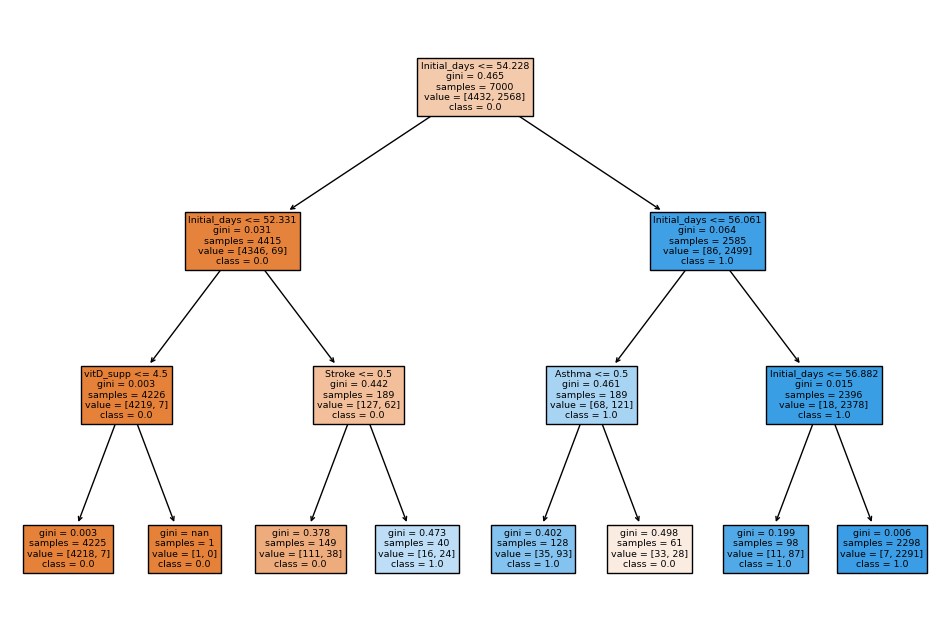

In [46]:
#Limit and Fit training data
initial_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
initial_dt.fit(X_train, y_train)

#Print the target and classes
print('Target: [{}: {}]'.format("ReAdmis", ', '.join(map(str, initial_dt.classes_))))

from sklearn.tree import DecisionTreeClassifier, plot_tree

#Plot the decision tree
def plotDecisionTree(model, feature_names, class_names):
    plt.figure(figsize=(12,8))
    plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
    plt.show()

plotDecisionTree(initial_dt, feature_names=X_train.columns.to_list(), class_names=list(map(str, initial_dt.classes_)))

In [47]:
#Predict test set labels
final_y_pred = initial_dt.predict(X_test)

# Evaluate acc_test
final_acc_test = accuracy_score(y_test, final_y_pred)
print('Test set accuracy of decision tree model: {:.2f}'.format(final_acc_test)) 

# Compute the probabilities of obtaining the positive class
final_y_pred_proba = initial_dt.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
final_roc_auc = roc_auc_score(y_test, final_y_pred_proba)

# Generate Confusion Matrix
final_matrix = confusion_matrix(y_test, final_y_pred)
print("\nThe confusion matrix for this Decision Tree model:")
print("Predicted Not Readmitted | Predicted Readmitted")
print(f"                   {final_matrix[0]} Actual Not Readmitted")
print(f"                   {final_matrix[1]} Actual Readmitted")

# Generate mean_squared_error and root mean squared error
mse = mean_squared_error(y_test, final_y_pred)
root_mse = mse**(1/2)
print(f"The mean squared error of this model is: {mse}")
print(f"The root mean squared error of this model is: {round(root_mse, 2)}\n\n")

# Generate classification report
print(classification_report(y_test, final_y_pred))

print('\nThe Area Under the Curve (AUC) score of the decision tree model is: {:.2f}'.format(final_roc_auc))

Test set accuracy of decision tree model: 0.98

The confusion matrix for this Decision Tree model:
Predicted Not Readmitted | Predicted Readmitted
                   [1866   33] Actual Not Readmitted
                   [  41 1060] Actual Readmitted
The mean squared error of this model is: 0.024666666666666667
The root mean squared error of this model is: 0.16


              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1899
         1.0       0.97      0.96      0.97      1101

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000


The Area Under the Curve (AUC) score of the decision tree model is: 1.00


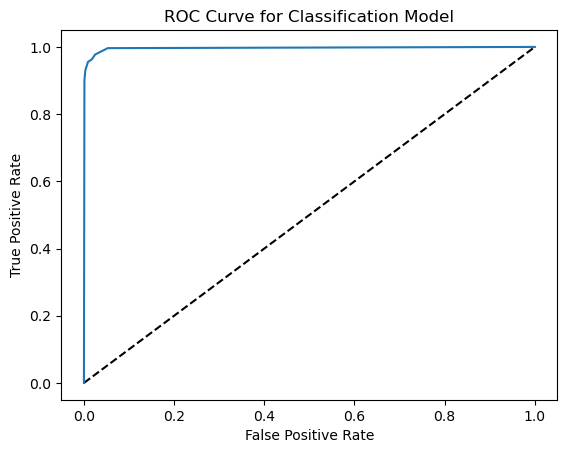

In [48]:
#Generate ROC plot and provide AUC score 
fpr, tpr, thresholds = roc_curve(y_test, final_y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classification Model')
plt.show()